### Building a ROC Curve 
---

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

%matplotlib inline 

In [2]:
data = load_breast_cancer()

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = 1 - data.target

In [5]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Let's work towards plotting a ROC Curve once 

In [6]:
X_train , X_test, y_train, y_test = train_test_split(X,y, random_state=23)

In [8]:
lr = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter=10000)

lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Take a look at our predictions - can we calculate the TPR and FPR for the threshold value of .5? 

### Remember 
---
### TPR = TP / (TP + FN) 

### FPR = FP / (FP + TN)

### Can you use `.zip()` here?

In [ ]:
true_positives = y_test - preds

In [9]:
preds = lr.predict(X_test)

In [16]:
(y_test != preds).mean()

0.03496503496503497

In [18]:
(y_test == preds).mean()

0.965034965034965

In [10]:
preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [17]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [19]:
len(preds)

143

In [21]:
number = 0
for i in y_test == preds:
    if i == False:
        number += 1
print(1 - number/len(preds))

0.965034965034965


In [22]:
138 / 143

0.965034965034965

In [27]:
((y_test - preds) == 0).mean()

0.965034965034965

In [33]:
true_pos = 0
false_pos = 0
true_neg = 0
false_neg = 0
for actual, prediction in zip(y_test, preds):
    if (actual == 1) & (prediction == 1):
        true_pos += 1
    elif (actual == 0) & (prediction == 1):
        false_pos += 1 
    elif (actual == 0) & (prediction == 0):
        true_neg += 1
    elif (actual == 1) & (prediction == 0):
        false_neg += 1
tpr = true_pos/(true_pos+false_neg)
fpr = false_pos/(false_pos+true_neg)

In [35]:
differences = y_test - preds

tps = []
fps = []

for i in differences:
    if i == -1:
        tps.append(i)
    elif i == 1:
        fps.append(i)

### What is the default threshold in sci-kit learn? - How can we manually change it? 

In [38]:
### function 


### Let's aim to calculate the TPR and FPR over a range of different alpha values 

In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [46]:
thresholds = np.linspace(0, 1.0001, 1000)

In [44]:
threshold = .05
manual_preds = []
for p in lr.predict_proba(X_test)[:,1]:
    if p < threshold:
        manual_preds.append(0)
    else:
        manual_preds.append(1)
true_pos = 0
false_pos = 0
true_neg = 0
false_neg = 0
for actual, prediction in zip(y_test, manual_preds):
    if (actual == 1) & (prediction == 1):
        true_pos += 1
    elif (actual == 0) & (prediction == 1):
        false_pos += 1 
    elif (actual == 0) & (prediction == 0):
        true_neg += 1
    elif (actual == 1) & (prediction == 0):
        false_neg += 1
tpr = true_pos/(true_pos+false_neg)
fpr = false_pos/(false_pos+true_neg)

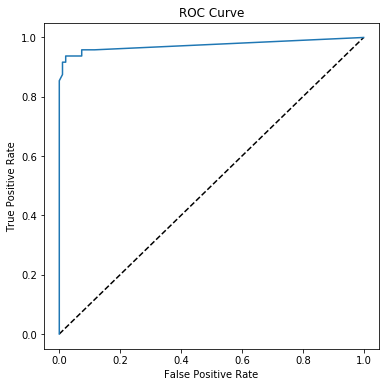

In [64]:
thresholds = list(np.linspace(0, 1.001, 1000))
tprs = []
fprs = []
for value in thresholds:
    manual_preds = []
    for p in lr.predict_proba(X_test)[:,1]:
        if p < value:
            manual_preds.append(0)
        else:
            manual_preds.append(1)
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for actual, prediction in zip(y_test, manual_preds):
        if (actual == 1) & (prediction == 1):
            true_pos += 1
        elif (actual == 0) & (prediction == 1):
            false_pos += 1 
        elif (actual == 0) & (prediction == 0):
            true_neg += 1
        elif (actual == 1) & (prediction == 0):
            false_neg += 1
    tprs.append(true_pos/(true_pos+false_neg))
    fprs.append(false_pos/(false_pos+true_neg))
fig, ax = plt.subplots(figsize=(6,6))
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
ax.plot([0,1],[0,1], linestyle= '--', color='black')
ax.plot(fprs, tprs)
ax.set_title('ROC Curve');

In [61]:
tprs

[0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 

### Let's start plotting!